In [2]:
import numpy 
import matplotlib.pyplot as plt 



In [3]:

import tensorflow as tf 

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Input, Flatten
from tensorflow.keras.optimizers import Adam

In [14]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (x_train.shape)
x_train = x_train.reshape(60000,784)
print(x_train.shape)
x_test = x_test.reshape(10000,784)


(60000, 28, 28)
(60000, 784)


In [15]:
#Fit the input datas 

x_train = x_train / 255.0
x_test = x_test / 255.0 


In [6]:
#Create the model 

i = Input(shape =(784) )
x  = Dense(50,activation='relu')(i)
x  = Dense(4,activation='relu')(x)
x = Dense (784,activation = 'relu')(x)

model = Model(i,x)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 204       
_________________________________________________________________
dense_2 (Dense)              (None, 784)               3920      
Total params: 43,374
Trainable params: 43,374
Non-trainable params: 0
_________________________________________________________________


In [7]:
adam= Adam(learning_rate= 0.001)
model.compile(
  loss='mse',
  optimizer=adam,
  metrics=['accuracy']
)

In [8]:
r = model.fit(x_train, x_train, epochs=800,validation_data=(x_test,x_test), batch_size=8192,shuffle = True)

=============================] - 2s 249ms/step - loss: 0.0514 - accuracy: 0.0072 - val_loss: 0.0513 - val_accuracy: 0.0096
Epoch 662/800
8/8 [==============================] - 2s 278ms/step - loss: 0.0514 - accuracy: 0.0075 - val_loss: 0.0513 - val_accuracy: 0.0088
Epoch 663/800
8/8 [==============================] - 2s 246ms/step - loss: 0.0514 - accuracy: 0.0075 - val_loss: 0.0513 - val_accuracy: 0.0095
Epoch 664/800
8/8 [==============================] - 2s 239ms/step - loss: 0.0514 - accuracy: 0.0074 - val_loss: 0.0513 - val_accuracy: 0.0096
Epoch 665/800
8/8 [==============================] - 3s 359ms/step - loss: 0.0514 - accuracy: 0.0077 - val_loss: 0.0513 - val_accuracy: 0.0094
Epoch 666/800
8/8 [==============================] - 3s 366ms/step - loss: 0.0514 - accuracy: 0.0075 - val_loss: 0.0513 - val_accuracy: 0.0091
Epoch 667/800
8/8 [==============================] - 3s 417ms/step - loss: 0.0514 - accuracy: 0.0077 - val_loss: 0.0513 - val_accuracy: 0.0094
Epoch 668/800
8/8 [

In [16]:
i2 = Input(shape =(784) )
x2  = Dense(50,activation='relu')(i2)
x2  = Dense(4,activation='relu')(x2)
encoder  = Model (i2,x2)
encoder.layers[1].set_weights(model.layers[1].get_weights())
encoder.layers[2].set_weights(model.layers[2].get_weights())



In [10]:
print( encoder.predict(x_train).shape)

(60000, 4)


In [20]:
plt.subplot(211)
plt.imshow(x_train[1])


TypeError: Invalid shape (784,) for image data

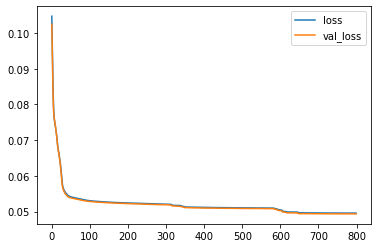

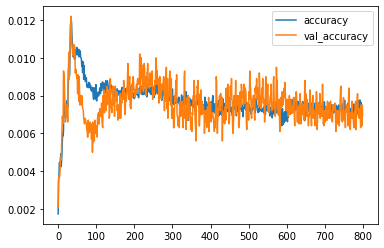

In [10]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7]


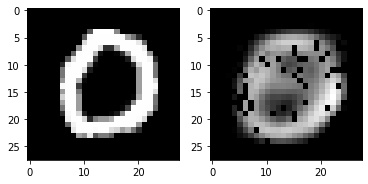

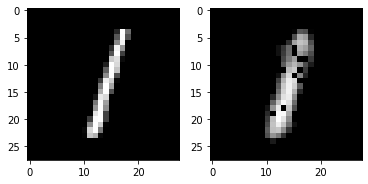

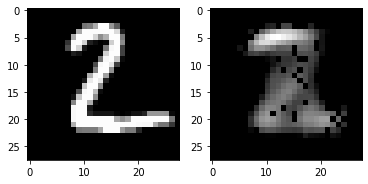

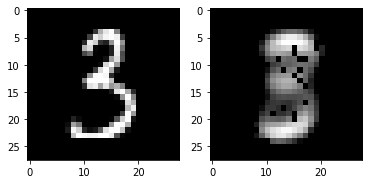

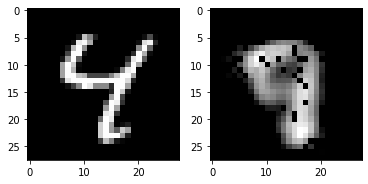

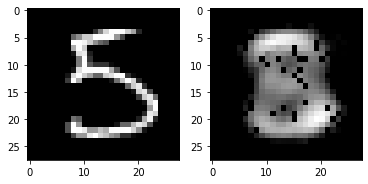

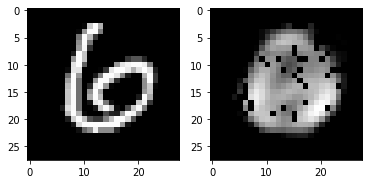

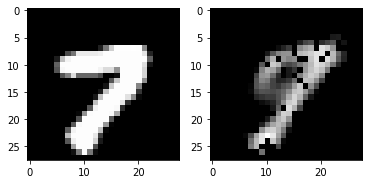

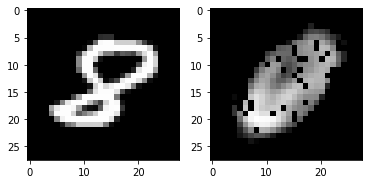

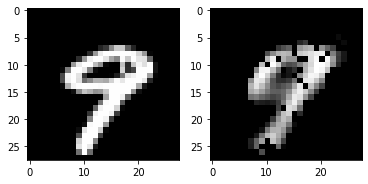

In [11]:
#COmpare the inputs and the outputs of the image 
x_train = x_train.reshape(60000,28,28)
x_train = x_train * 255 
a = model.predict(x_test)
x_test = x_test.reshape(10000,28,28)
x_test = x_test * 255 
a = a.reshape(10000,28,28)
L = [71,2,1,76,6,15,11,79,61,9]
print(y_test[:80])
for i in range (10): 
    plt.subplot(121)
    plt.imshow(x_test[L[i]],cmap = 'gray')
    plt.subplot(122)
    plt.imshow(a[L[i]],cmap = 'gray')
    plt.show()


[[56.59665  27.14046  27.084255  8.959044]]
1


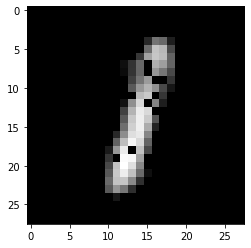

In [26]:
import numpy as np
i2 = Input(shape =(784) )
x2  = Dense(50,activation='relu')(i2)
x2  = Dense(4,activation='relu')(x2)
encoder  = Model (i2,x2)
encoder.layers[1].set_weights(model.layers[1].get_weights())
encoder.layers[2].set_weights(model.layers[2].get_weights())

i3 = Input(shape =(4) )
x3  = Dense(784,activation='relu')(i3)

decoder = Model(i3,x3)

decoder.layers[1].set_weights(model.layers[3].get_weights())
a = encoder.predict(x_test[2].reshape(1,784))
print(a)

b = decoder.predict([[56,27,27,8]]).reshape(28,28)


print(y_test[2])
plt.imshow(b, cmap = 'gray')

In [102]:
output = model.predict(x_test)

output = output.reshape(10000,28,28)
output = output*255 



In [2]:
x_1 = x_train[1]
x_1 = x_1.reshape(1,784)
print (y_train[1])
a = model.predict(x_1)
a = a.reshape(28,28)
plt.imshow(a)

NameError: name 'x_train' is not defined

In [60]:

x_test = x_test.reshape(10000,28,28)
x_test = x_test * 255 

for i in range (4):
    plt.figure(1)
    plt.subplot(2,1,1)
    plt.imshow(output[i],cmap = 'gray')
    print (y_test[i])
    plt.subplot(2,1,2)
    plt.imshow(x_test[i],cmap= 'gray')
    plt.show()

NameError: name 'output' is not defined